# Tekst som data

## Indhold
**Hvorfor tekst?**

**Tekst og machine learning**
- NLP og text mining
    - Mange betegnelser for lignende praksisser: NLP, text mining, computer-assisted text analysis, quantitative text analysis
    - NLP: Få en computer til at forstå det menneskelige sprog (https://play.aidungeon.io/)
    - Text mining: Udlede information om text med computationelle metoder (med brug af NLP)
- Superviseret: Kategoriseringer, sentiment, udlede information
- Usuperviseret: Temaer, grupperinger, ordforbindelser

**Demo: Simpelt eksempel med text mining (netværksvisualisering af klima-tweets)**

**Tekst i Python**
- Hvad er strings?
- Hvordan kan vi arbejde med tekster i Python? (helt simpelt)
- Simple teksthåndteringsmetoder

**ØVELSE 1: Simpel teksthåndtering**

**Pre-processing (med basisfunktioner)**
- Tokenization
- Tegnsætning
- Stopord
- Lowercase
- Ordstammer
- Navneform / infinitv

**Simpel ordtælling**

**ØVELSE 2: Pre-processing og simpel ordtælling**
- Pre-process en enkelt tekst/tekststump
- Optæl ord

**Sprogmodeller (stanza)**
- Hvad er en sprogmodel?
- Brug af stanza
- Indhold i stanza:
    - tokenizer
    - lemmatizer
    - ner
    - sentiment analysis
    - POS-tagging
- Udlede meningsfulde tokens med stanza

**ØVELSE 3: Meningsfulde tokens med stanza**
- Pre-process samme tekst/tekststump med stanza
- Optæl ord

**Tidy text data**
- Hvordan arbejder vi med større tekstsamlinger? (corpora)
- Tidy text data: Token som observation
    - Fordele:
        - Fastholder dokumenttilhør og andre relevante oplysninger
        - Gør det nemt at arbejde med
        - Vi kan bruge metoder, som vi kender fra at arbejde med struktureret data
    - Ulemper: 
        - Data fylder hurtigt meget
        - Kan have effekt på beregningstiden
        - Ofte ikke kompatibelt med andre modeller
        
**Fra text corpora til tidy text**
- Udarbejd tokenizer funktion
- Brug af apply til at tokenize
- Explode til at gøre tidy
- Teknikker til at arbejde med tidy text: `groupby`, `isin`, plots

**ØVELSE 4: Tidy text data (reddit data)**
- Udarbejd tokenizer funktion
- Brug funktion til at tokenize reddit data
- Gør tidy
- Optæl ord via groupby

**Usuperviseret maskinlæring og tekst: topic models**
- Topic models en meget udbredt teknik til at udforske mønstre
- Fordele
    - Overblik, inddeling
- Ulemper
    - Samme som med klynger: ekstern validitet
    - Høj grad af vilkårlighed (hvor mange topics?)
    - Sårbar over for små ændringer i datahåndtering
- Bag-of-words: Ords kontekst ikke inddraget

**Brug af topic models i Python**
- Alternativ vægtning: tf-idf
- Brug af pakken X til topic models
- LDAviz?

**ØVELSE 5: Topic models i Python (reddit data)**
- Forbered data til topic model
- Kør topic model
- Visualiser resultater


## Til FC
- Alternativ vægtning: tf-idf (hurtigt fra tekst til corpus uden brug af sprogmodel til tokenization)
- Subreddit data
- Ord til dummy-variable
- Predict positiv/negativ med random forests

In [1]:
import os
import pandas as pd
from pprint import pprint
import json
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime as dt
import re
from itertools import compress
import ast
import spacy
import stanza
import nltk
from nltk.corpus import stopwords

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(20,10)})

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

#stanza.download('da')
#!python -m spacy download da_core_news_sm # Requires restarting kernel after install
#nlp = spacy.load("da_core_news_sm", disable=['parser', 'ner'])
nlp = stanza.Pipeline('da')
#mallet_path = os.path.join('C:\\', 'mallet', 'mallet-2.0.8', 'bin', 'mallet.bat') # update this path

2021-03-09 09:45:51 INFO: Loading these models for language: da (Danish):
| Processor | Package |
-----------------------
| tokenize  | ddt     |
| pos       | ddt     |
| lemma     | ddt     |
| depparse  | ddt     |

2021-03-09 09:45:51 INFO: Use device: cpu
2021-03-09 09:45:51 INFO: Loading: tokenize
2021-03-09 09:45:51 INFO: Loading: pos
2021-03-09 09:45:52 INFO: Loading: lemma
2021-03-09 09:45:52 INFO: Loading: depparse
2021-03-09 09:45:53 INFO: Done loading processors!


# Tekst som data: Håndtering af tekstdata og ’text mining’

## Hvorfor tekst?

## Tekst og machine learning
- NLP og text mining
    - Mange betegnelser for lignende praksisser: NLP, text mining, computer-assisted text analysis, quantitative text analysis
    - NLP: Få en computer til at forstå det menneskelige sprog (https://play.aidungeon.io/)
    - Text mining: Udlede information om text med computationelle metoder (med brug af NLP)
- Superviseret: Kategoriseringer, sentiment, udlede information
- Usuperviseret: Temaer, grupperinger, ordforbindelser

**Demo: Simpelt eksempel med text mining (netværksvisualisering af klima-tweets?)**

# Tekst i Python

In [5]:
tweetdata_url = "https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/poltweets_sample.csv"
tweets_df = pd.read_csv(tweetdata_url)

redditdata_url = "https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/reddit_rdenmark-comments_01032021-08032021_long.csv"
reddit_df = pd.read_csv(redditdata_url)

## String metoder

Simple teksthåndteringsmetoder...

In [86]:
tweet = tweets_df.loc[584, 'full_text']
tweet

'Hjemmeværnet, Politikadetterne og Forsvaret klarer ærterne ved grænserne, så Politiet kan kaste sig over at gøre danskere mere trygge. Sikker på,at @ClausOxfeldt bliver lykkelig for vort krav. Han har jo brugt megen energi på at give DFs grænseindsats skylden for mandskabsmangel. https://t.co/PgenOdeSwn'

In [87]:
type(tweet)

str

In [93]:
tweet.startswith("Hjemmeværn")

True

In [94]:
tweet.endswith("DF")

False

In [95]:
"energi" in tweet

True

In [96]:
"politi" in tweet # findes ikke, da politi står med stort

False

In [97]:
"politi" in tweet.lower()

True

In [98]:
tweet.upper()

'HJEMMEVÆRNET, POLITIKADETTERNE OG FORSVARET KLARER ÆRTERNE VED GRÆNSERNE, SÅ POLITIET KAN KASTE SIG OVER AT GØRE DANSKERE MERE TRYGGE. SIKKER PÅ,AT @CLAUSOXFELDT BLIVER LYKKELIG FOR VORT KRAV. HAN HAR JO BRUGT MEGEN ENERGI PÅ AT GIVE DFS GRÆNSEINDSATS SKYLDEN FOR MANDSKABSMANGEL. HTTPS://T.CO/PGENODESWN'

## String metoder i pandas

Mange string metoder kan anvendes på pandas series - ofte ved at tilføje `.str`

In [102]:
tweets_df['full_text'].str.startswith("Hjemmeværn").head()

0    False
1    False
2    False
3    False
4    False
Name: full_text, dtype: bool

In [105]:
tweets_df['full_text'].str.startswith("Hjemmeværn").sum() # Hvor mange tweets starter med hjemmeværn?

1

`str.contains()` på en pandas series svarer til at bruge `in` på en string.

In [108]:
tweets_df['full_text'].str.contains("DF").sum() # Hvor mange tweets taler om DF?

118

Fordi metoder som `str.startswith()` og `str.contains()` returnerer logiske værdier (`True`/`False`), så kan de bruges til subsetting.

In [109]:
DFtweets_df = tweets_df.loc[tweets_df['full_text'].str.contains("DF"), :]
DFtweets_df

,created_at,id,full_text,is_quote_status,retweet_count,favorite_count,favorited,retweeted,is_retweet,hashtags,urls,user_followers_count,party,tweet_len
36,2019-01-24 22:39:33+00:00,1088567004733341700,@RosenkrantzT @Spolitik @alternativet_ Det er ...,False,1,4,False,False,False,[],[],4064,Alternativet,242
375,2020-10-22 10:02:29+00:00,1319217553772859400,"Har igen, kl. 13 (sammen med V, K og DF) indka...",False,8,54,False,False,False,"['dkpol', 'dksocial']",[],4064,Alternativet,279
513,2019-12-12 13:56:01+00:00,1205124148260954000,Ifølge DR har i al fald den ene af de terror-s...,False,7,55,False,False,False,[],"[{'url': 'https://t.co/D6WhHzVVgu', 'expanded_...",12276,Dansk Folkeparti,275
515,2020-12-05 11:44:00+00:00,1335188170040897500,"Havde håbet på meget mere på ældreområdet, her...",False,3,4,False,False,False,['dkpol'],"[{'url': 'https://t.co/HYLZ24Z632', 'expanded_...",2748,Dansk Folkeparti,210
520,2018-08-08 13:23:10+00:00,1027183438510608400,"Spørgelysten var stor på det pressemøde, der t...",False,3,18,False,False,False,"['dkpol', 'FL19']",[],12276,Dansk Folkeparti,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,2018-11-30 22:19:14+00:00,1068630561709875200,“Alternativet er dybt politisk uenige i DF’s p...,False,0,2,False,False,False,"['dkpol', 'derforuffe', 'alternativet']",[],3109,Uden for folketingsgrupperne,138
4750,2020-07-08 17:40:44+00:00,1280919762999132200,@DonPeHa Fordi der hele tiden bliver hetzet im...,False,0,0,False,False,False,[],[],37443,Uden for folketingsgrupperne,71
5039,2017-01-26 08:26:32+00:00,824533970201223200,Til afrikansk topmøde Addis Ababa: Meget bekym...,False,19,41,False,False,False,"['globalgagrule', 'dk4hrc', 'dkpol']",[],5749,Venstre,140
5087,2019-04-11 08:11:51+00:00,1116252507360174100,På administration i sundhedsvæsenet bruger Dan...,False,30,176,False,False,False,"['dkpol', 'sundpol']",[],26669,Venstre,296


Visualisering på baggrund af partier:

<AxesSubplot:xlabel='party'>

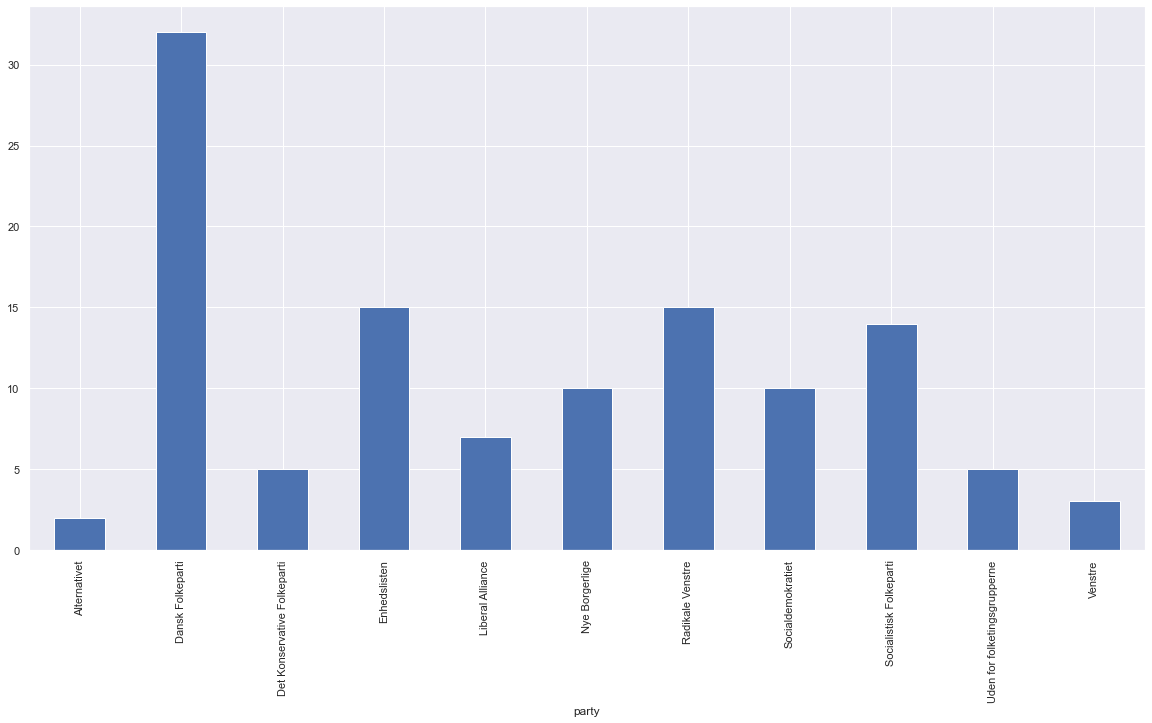

In [112]:
DFtweets_df.groupby('party').size().plot.bar()

# ØVELSE 1: Simpel teksthåndtering

I øvelserne i dag skal i arbejde med et datasæt bestående af kommentarer fra reddit. Alle kommentarer er taget fra posts på r/denmark (reddit.com/r/denmark) fra 1/3-8/3 2021.

1. Indlæs data som en pandas data frame
    - Link til data: https://raw.githubusercontent.com/CALDISS-AAU/course_ndms-I/master/datasets/reddit_rdenmark-comments_01032021-08032021_long.csv
2. Dan et subset bestående af alle kommentarer, der nævner "menneskerettigheder" (kommentarteksten er i kolonnen `comment_body`). Hvor mange kommentarer er der?

**Bonus**
- Kan du udregne gennemsnitsscore for de kommentarer, der nævner menneskerettigheder? (score fremgår af kolonnen `comment_score`)

# Bearbejdning af tekstdata (pre-processing af tekst)

At arbejde med hele rå strings er for det meste ikke særlig praktisk.

- Søgning på substrings matcher også, hvis det indgår inde i et ord (medmindre man bruger regular expression, som vi ikke kommer ind på her)
- Vanskeligt at identificere nøgleord / de mest brugte eller væsentligste ord i teksten
- Python adskiller mellem små og store bogstaver
- Vanskeligt at identificere ord i kontekst

Måden man løser mange disse udfordringer, er ved at behandle ordene i teksterne enkeltvis. På den måde gøres hvert enkelt ord til en analyseenhed. Processen i at omdanne tekst til enkeltord kaldes "tokenization", da de færdigbehandlede ord referes til som tokens. 

## Tokenization af tekst

Formålet med tokenization er at konvertere tekst til enkelte analyseenheder. I denne proces frasorteres også elementer i teksten, som umiddelbart ikke bidrager med noget meningsfuldt i en analyse af indholdet (fx tegnsætning, hvorvidt ordet er stavet med stort, fyldord som fx stedord osv.)

Tokenization indeholder typisk følgende skridt:

1. Opdeling af tekst i enkeltord
2. Frasortering af tegnsætning
3. Evt. konverter til små bogstaver
4. Frasorter stopord
5. Evt. konverter ord til deres stamme eller navneform

### Tokenization (med basisfunktioner)

Lad os først se på, hvordan vi kan implementere disse skridt enkeltvis med basisfunktioner for at se, hvordan teksten ændres skridt for skridt.

#### 1. Opdeling af tekst i enkeltord

Første skridt i tokenization er at omdanne teksten til en samling af enkeltord. På den måde er hver enkelt ord afgrænset, og vi kan holde styr på deres placering i teksten gennem deres indeks.

In [119]:
print(tweet)

words = tweet.split(" ")

print(words)

Hjemmeværnet, Politikadetterne og Forsvaret klarer ærterne ved grænserne, så Politiet kan kaste sig over at gøre danskere mere trygge. Sikker på,at @ClausOxfeldt bliver lykkelig for vort krav. Han har jo brugt megen energi på at give DFs grænseindsats skylden for mandskabsmangel. https://t.co/PgenOdeSwn
['Hjemmeværnet,', 'Politikadetterne', 'og', 'Forsvaret', 'klarer', 'ærterne', 'ved', 'grænserne,', 'så', 'Politiet', 'kan', 'kaste', 'sig', 'over', 'at', 'gøre', 'danskere', 'mere', 'trygge.', 'Sikker', 'på,at', '@ClausOxfeldt', 'bliver', 'lykkelig', 'for', 'vort', 'krav.', 'Han', 'har', 'jo', 'brugt', 'megen', 'energi', 'på', 'at', 'give', 'DFs', 'grænseindsats', 'skylden', 'for', 'mandskabsmangel.', 'https://t.co/PgenOdeSwn']


#### 2. Frasortering af tegnsætning

Tegnsætning er typisk "støj" i text mining teknikker, så det frasorteres typisk.

Her frasorteres tegnsætning ved at gå igennem hvert ord med et for loop og derefter gå igennem forskellige tegnsætninger (`punct_list`) i et for loop og erstatte dem med ingenting.

In [121]:
punct_list = [',', '-','.','?','!']

words_nopunct = []

for word in words:
    for punct in punct_list:
        word = word.replace(punct, "")
    words_nopunct.append(word)
    
words_nopunct = list(filter(None, words_nopunct))

print(words_nopunct)

['Hjemmeværnet', 'Politikadetterne', 'og', 'Forsvaret', 'klarer', 'ærterne', 'ved', 'grænserne', 'så', 'Politiet', 'kan', 'kaste', 'sig', 'over', 'at', 'gøre', 'danskere', 'mere', 'trygge', 'Sikker', 'påat', '@ClausOxfeldt', 'bliver', 'lykkelig', 'for', 'vort', 'krav', 'Han', 'har', 'jo', 'brugt', 'megen', 'energi', 'på', 'at', 'give', 'DFs', 'grænseindsats', 'skylden', 'for', 'mandskabsmangel', 'https://tco/PgenOdeSwn']


#### 3. Evt. konverter til små bogstaver

Et primært formål med tokenization er, at ord med samme semantiske betydning bliver identiske. Derfor konverteres ord typisk til små bogstaver for at ensrette tekstmaterialet.

I nogen tilfælde kan det dog give mening at gøre dette med det samme, så man nemmere kan identifcere egenavne.

In [123]:
words_lower = [word.lower() for word in words_nopunct]

print(words_lower)

['hjemmeværnet', 'politikadetterne', 'og', 'forsvaret', 'klarer', 'ærterne', 'ved', 'grænserne', 'så', 'politiet', 'kan', 'kaste', 'sig', 'over', 'at', 'gøre', 'danskere', 'mere', 'trygge', 'sikker', 'påat', '@clausoxfeldt', 'bliver', 'lykkelig', 'for', 'vort', 'krav', 'han', 'har', 'jo', 'brugt', 'megen', 'energi', 'på', 'at', 'give', 'dfs', 'grænseindsats', 'skylden', 'for', 'mandskabsmangel', 'https://tco/pgenodeswn']


#### 4. Frasorter stopord

Et andet formål med tokenization er, at vi står tilbage med analyseenheder (ord), som kan hjælpe os til at sige noget om indholdet i teksten. Alle sprog har ord, som ikke bærer en speciel semantisk betydning. Det kunne fx være stedord (den, det, en, et, jeg, der osv.) og forbindende ord (og, eller, også, efter, før osv.).

Disse ord kaldes 'stopord'.

Herunder definerer vi vores egen liste af stopord og frasorterer dem med et for loop og en if-betingelse:

In [125]:
stopwords = ['og', 'klarer', 'ved', 'så', 'kan', 'kaste', 'sig', 'over', 'at', 'gøre', 'mere', 'bliver', 
             'for', 'vort', 'han', 'har', 'jo', 'brugt', 'megen', 'på', 'give', 'for']

words_nostop = []

for word in words_lower:
    if word not in stopwords:
        words_nostop.append(word)
        
print(words_nostop)

['hjemmeværnet', 'politikadetterne', 'forsvaret', 'ærterne', 'grænserne', 'politiet', 'danskere', 'trygge', 'sikker', 'påat', '@clausoxfeldt', 'lykkelig', 'krav', 'energi', 'dfs', 'grænseindsats', 'skylden', 'mandskabsmangel', 'https://tco/pgenodeswn']


Udover stopord har vi også noget "twitter-støj"; fx links og brug af @ til at tagge andre brugere.

In [126]:
tokens = []

for word in words_nostop:
    if word.startswith("@") or word.startswith("https"):
        continue
    tokens.append(word)
    
print(tokens)

['hjemmeværnet', 'politikadetterne', 'forsvaret', 'ærterne', 'grænserne', 'politiet', 'danskere', 'trygge', 'sikker', 'påat', 'lykkelig', 'krav', 'energi', 'dfs', 'grænseindsats', 'skylden', 'mandskabsmangel']


#### 5. Evt. konverter ord til deres stamme eller navneform

Formålet med tokenization er både at frasortere støj i teksten og ensrette tokens sådan, at der kun er ét token for alle ord med samme semantiske betydning.

Fx er det uhensigtsmæssigt at behandle "Valgkamp" og "valgkamp" som to forskellige tokens, da det er det samme ord bare med stort og lille forbogstav.

Netop fordi hvert ord som udgangspunkt behanldes som unikt, giver det nogen udfordring ift. grammatik, da hver ordbøjning bliver hver sit token - medmindre man gør noget ved det!

Derfor er en typisk praksis enten at konvertere ordet til stammen (stemming). Her ville ord som "koste", "koster", "kostede" alle konverteres til "kost", da det er ordets stamme.

En anden praksis er at konvertere til navneformen (lemmatization). Her ville ord som "koste", "koster", "kostede" alle konverteres til "koste", da det er navneform for ordet.

Sådanne konverteringer kræver, at man bruger i forvejen trænede sprogmodeller, da stamme og navneform vil variere fra sprog til sprog. Heldigvis er der udviklet mange af disse værktøjer.

Dog er sådan nogen værktøjer ikke uden fejl, da det tager lang tid for en computer at lære, hvad forskellen er på "kost" (noget man spiser), "kost" (noget man fejer med) og "kost" (stammen at verbum "koste").

#### Tokenization som funktion

In [129]:
def tokenizer_basic(text):
    punct_list = [',', '-','.','?','!']
    stopwords = ['og', 'klarer', 'ved', 'så', 'kan', 'kaste', 'sig', 'over', 'at', 'gøre', 'mere', 'bliver', 
                 'for', 'vort', 'han', 'har', 'jo', 'brugt', 'megen', 'på', 'give', 'for']

    words = text.split(" ")

    tokens = []

    for word in words:
        if word.startswith("@") or word.startswith("https"):
            continue

        for punct in punct_list:
            word = word.replace(punct, "")

        word = word.lower()

        if word not in stopwords:
            tokens.append(word)


    tokens = list(filter(None, tokens))

    return(tokens)

In [132]:
tokens = tokenizer_basic(tweet)

print(tokens)

['hjemmeværnet', 'politikadetterne', 'forsvaret', 'ærterne', 'grænserne', 'politiet', 'danskere', 'trygge', 'sikker', 'påat', 'lykkelig', 'krav', 'energi', 'dfs', 'grænseindsats', 'skylden', 'mandskabsmangel']


### Ord som series

Med teksten konverteret til tokens, kan vi nemmere behandle dem.

Ordene er lige nu i en liste, men de kan nemt konverteres til en pandas series, så vi kan bruger pandas metoder til at udforske tekstindholdet (selvfølgelig ikke så spændende på et enketl tweet):

In [133]:
tokens_series = pd.Series(tokens)

tokens_series.value_counts()

grænserne           1
skylden             1
grænseindsats       1
dfs                 1
ærterne             1
politikadetterne    1
krav                1
sikker              1
mandskabsmangel     1
energi              1
lykkelig            1
forsvaret           1
politiet            1
danskere            1
hjemmeværnet        1
påat                1
trygge              1
dtype: int64

# ØVELSE 2: Tokenization

Prøv at undersøg tekstindholdet af et af opslagene i redditdata: `post = reddit_df.loc[503, 'post_selftext']`

1. Tokenize opslaget - enten med en funktion eller trin for trin
2. Lav en ordoptælling ved at konvertere jeres tokens til en pandas series og bruge `.value_counts`

In [136]:
post = reddit_df.loc[503, 'post_selftext']

## Tokenization med sprogmodeller

### Hvad er en sprogmodel?

### Introduktion til stanza
- Indhold i stanza:
    - tokenizer
    - lemmatizer
    - ner
    - sentiment analysis
    - POS-tagging

### Brug af stanza i Python

# ØVELSE 3: Meningsfulde tokens med stanza

- Pre-process samme tekst/tekststump som før med stanza
- Optæl ord

# Tidy text data
- Hvordan arbejder vi med større tekstsamlinger? (corpora)
- Tidy text data: Token som observation
    - Fordele:
        - Fastholder dokumenttilhør og andre relevante oplysninger
        - Gør det nemt at arbejde med
        - Vi kan bruge metoder, som vi kender fra at arbejde med struktureret data
    - Ulemper: 
        - Data fylder hurtigt meget
        - Kan have effekt på beregningstiden
        - Ofte ikke kompatibelt med andre modeller

## Fra text corpora til tidy text
- Udarbejd tokenizer funktion
- Brug af apply til at tokenize
- Explode til at gøre tidy
- Teknikker til at arbejde med tidy text: `groupby`, `isin`, plots

# ØVELSE 4: Tidy text data (reddit data)
- Udarbejd tokenizer funktion
- Brug funktion til at tokenize reddit data
- Gør tidy
- Optæl ord via groupby

# Usuperviseret maskinlæring og tekst: topic models
- Topic models en meget udbredt teknik til at udforske mønstre
- Fordele
    - Overblik, inddeling
- Ulemper
    - Samme som med klynger: ekstern validitet
    - Høj grad af vilkårlighed (hvor mange topics?)
    - Sårbar over for små ændringer i datahåndtering
- Bag-of-words: Ords kontekst ikke inddraget

## Brug af topic models i Python
- Brug af pakken gensim til topic models

# ØVELSE 5: Topic models i Python (reddit data)
- Forbered data til topic model
- Kør topic model
- Visualiser resultater